In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_LOWNOISE import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [3]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
    if config.diffusion == 0.1:
        diradd+= "LowNoise"
    elif config.diffusion == 10.:
        diradd += "HighNoise"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
hermite_dir += diradd+"/"

In [4]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    if "MSE" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")
    elif "est" in f:
        est =(np.load(hermite_dir+f, allow_pickle=True))
    elif "true" in f:
        true =(np.load(hermite_dir+f, allow_pickle=True))


/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/QuadSinHFLowNoise/Ridge_fQuadSinHF_DriftEvalExp_10240NPaths_3906e-03dT_Diff01_MSEs.parquet


In [5]:
print(mse.index[np.argmin(mse.values.flatten()).flatten()])

Int64Index([59], dtype='int64', name='index')


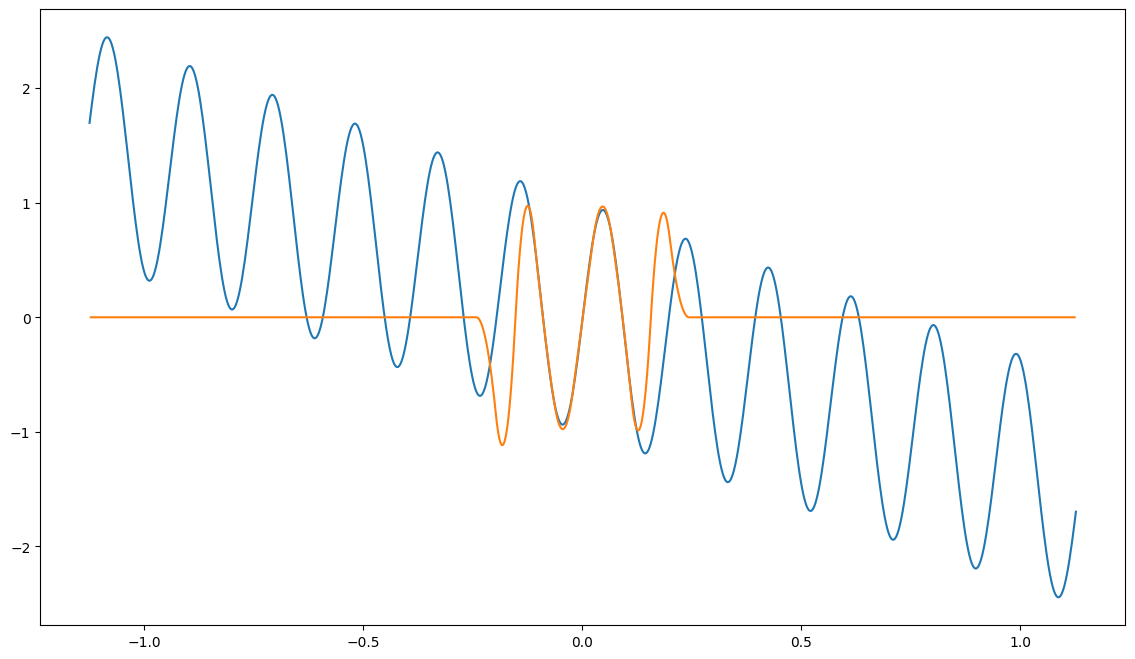

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
plt.plot(np.linspace(-1.5, 1.5, 1024), true, label="true")
plt.plot(np.linspace(-1.5, 1.5, 1024), est, label="est")
plt.show()

(array([9.0000e+00, 1.8000e+01, 2.0000e+01, 5.0000e+01, 8.8000e+01,
        1.3200e+02, 2.4200e+02, 3.9000e+02, 6.6300e+02, 1.1340e+03,
        1.8560e+03, 2.9020e+03, 4.2320e+03, 6.4010e+03, 9.2120e+03,
        1.2916e+04, 1.8338e+04, 2.4416e+04, 3.1636e+04, 3.9650e+04,
        4.8472e+04, 5.6978e+04, 6.5644e+04, 7.2047e+04, 7.7281e+04,
        7.9531e+04, 7.9791e+04, 7.7940e+04, 7.1948e+04, 6.6025e+04,
        5.8296e+04, 5.0862e+04, 4.3001e+04, 3.4813e+04, 2.8380e+04,
        2.2736e+04, 1.7899e+04, 1.4380e+04, 1.1331e+04, 9.0800e+03,
        7.6040e+03, 6.3480e+03, 5.5240e+03, 5.1590e+03, 4.6490e+03,
        4.1560e+03, 4.1520e+03, 3.9000e+03, 3.9600e+03, 3.8550e+03,
        3.8320e+03, 3.7650e+03, 3.7460e+03, 3.7740e+03, 3.8820e+03,
        3.9750e+03, 4.0950e+03, 4.2440e+03, 4.4250e+03, 4.5690e+03,
        4.8540e+03, 5.1010e+03, 5.2930e+03, 5.8140e+03, 6.2710e+03,
        6.8920e+03, 7.2170e+03, 8.2890e+03, 9.3490e+03, 1.0117e+04,
        1.0837e+04, 1.1141e+04, 1.0862e+04, 1.03

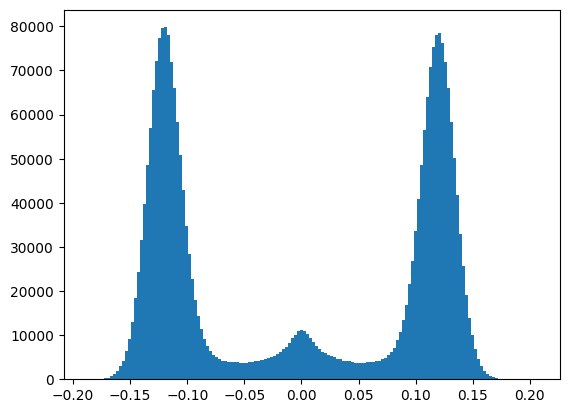

In [8]:
data = np.load(config.data_path, allow_pickle=True)
plt.hist(data.flatten(), bins=150)